# Лабораторная работа №6
## Keras. Нейронные сети

Keras — это библиотека для Python с открытым исходным кодом, которая позволяет легко создавать нейронные сети. Библиотека совместима с TensorFlow, Microsoft Cognitive Toolkit, Theano и MXNet. Tensorflow и Theano являются наиболее часто используемыми численными платформами на Python для разработки алгоритмов глубокого обучения, но они довольно сложны в использовании.

В достаточной степени подробно о keras описано в статье:
* https://habr.com/ru/company/ods/blog/325432/

Документация Keras доступна по ссылке:
* https://keras.io

In [1]:
# Установка Keras (В качестве backend используется tensorflow)
!pip install tensorflow
!pip install keras

In [2]:
import numpy as np
import pandas as pd
import keras as k
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

Using TensorFlow backend.


In [3]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Здесь train_images и train_labels — это тренировочный набор, то есть данные, необходимые для обучения. После обучения модель будет проверяться тестовым (или контрольным) набором, test_images и test_labels.

Изображения хранятся в массивах Numpy, а метки — в массиве цифр от 0 до 9. Изображения и метки находятся в прямом соответствии, один к одному.

Рассмотрим обучающие данные:

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

И контрольные данные:

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
len(test_labels)

10000

In [8]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

Сначала передадим нейронной сети обучающие данные, ***train_images*** и ***train_labels***. В результате этого сеть обучится сопоставлять изображения с метками. Затем мы предложим сети классифицировать изображения в test_images и проверим точность классификации по меткам из test_labels.

#### Архитектура сети

In [9]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

Основным строительным блоком нейронных сетей является слой (или уровень), модуль обработки данных, который можно рассматривать как фильтр для данных. Он принимает некоторые данные и выводит их в более полезной форме. В частности, слои извлекают представления из подаваемых в них данных, которые, как мы надеемся, будут иметь больше смысла для решаемой задачи. Фактически методика глубокого обучения заключается в объединении простых слоев, реализующих некоторую форму поэтапной очистки данных. Модель глубокого обучения можно сравнить с ситом, состоящим из последовательности фильтров все более тонкой очистки данных — слоев.

В данном случае наша сеть состоит из последовательности двух слоев Dense, которые являются тесно связанными (их еще называют полносвязными) нейронными Второй (и последний) слой — это 10-переменный слой потерь (softmax layer), возвращающий массив с 10 оценками вероятностей (в сумме дающих 1). Каждая оценка определяет вероятность принадлежности текущего изображения к одному из 10 классов цифр.

Чтобы подготовить сеть к обучению, нужно настроить еще три параметра для этапа ***компиляции***:
* функцию потерь, которая определяет, как сеть должна оценивать качество своей работы на обучающих данных и, соответственно, как корректировать ее в правильном направлении;
* оптимизатор — механизм, с помощью которого сеть будет обновлять себя, опираясь на наблюдаемые данные и функцию потерь;
* метрики для мониторинга на этапах обучения и тестирования — здесь нас будет интересовать только точность (доля правильно классифицированных изображений).

**Этап компиляции**

In [10]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

Перед обучением выполним предварительную обработку данных, преобразовав их в форму, которую ожидает получить нейронная сеть, и масштабируем их так, чтобы все значения оказались в интервале [0, 1]. Исходные данные — обучающие изображения — хранятся в трехмерном массиве (60000, 28, 28) типа uint8, значениями в котором являются числа в интервале [0, 255]. Мы преобразуем его в массив (60000, 28 * 28) типа float32 со значениями в интервале [0, 1].

In [11]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

**Подготовка меток**

In [12]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

Для обучения сети в случае использования библиотеки Keras достаточно вызвать метод fit сети — он пытается адаптировать (fit) модель под обучающие данные:

In [13]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 10s 169us/step - loss: 0.2621 - acc: 0.9241
Epoch 2/5
60000/60000 [==============================] - 9s 154us/step - loss: 0.1050 - acc: 0.9689
Epoch 3/5
60000/60000 [==============================] - 8s 138us/step - loss: 0.0691 - acc: 0.9791
Epoch 4/5
60000/60000 [==============================] - 8s 130us/step - loss: 0.0504 - acc: 0.9848
Epoch 5/5
60000/60000 [==============================] - 8s 140us/step - loss: 0.0384 - acc: 0.9886


В процессе обучения отображаются две величины: потери сети на обучающих данных и точность сети на обучающих данных.

В данном случае мы достигли точности 0,989 (98,9%) на обучающих данных. Теперь проверим, как модель распознает контрольный набор:

In [14]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)
print('test_loss:', test_loss)

10000/10000 [==============================] - 1s 87us/step
test_acc: 0.9809
test_loss: 0.06291297350843669


Точность на контрольном наборе составила 98 % — немного меньше, чем на тренировочном наборе. Эта разница между точностью на тренировочном и контрольном наборах демонстрирует пример переобучения (overfitting), когда модели машинного обучения показывают худшую точность на новом наборе данных по сравнению с тренировочным.

#### Для отображения объекта, можно воспользоваться следующим кодом

2


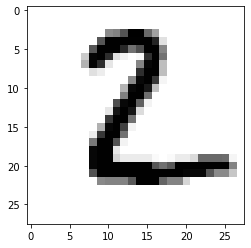

In [15]:
from keras.datasets import mnist
(train_images_raw, train_labels_raw), (test_images_raw, test_labels_raw) = mnist.load_data()

# Получение значения по изображению
# Цифра, распознанная нейронной сетью
digit = network.predict(test_images[1:2] )[0].argmax()

# Действительное изображение
digit_raw = test_images_raw[1]

print (digit)
# Вывод изображения
plt.imshow(digit_raw, cmap=plt.cm.binary)
plt.show()

### Задание 1

С помощью Keras создать нейронную сеть, предсказывающую оценку продукта пользователями по их отзывам, классифицируя ее по двум категориям: положительная или отрицательная. Эта задача называется анализом настроений (сентимент-анализ), и решаться будет с использованием сайта с кинорецензиями IMDb.

Спектр настроений обычно подразделяется на положительные, отрицательные и нейтральные категории. С использованием анализа настроений можно, например, прогнозировать мнение клиентов и их отношение к продукту на основе написанных ими обзоров. Поэтому анализ настроений широко применяется к обзорам, опросам, текстам и многому другому.


Для выполнения задания необходимо дописывать код в ячейки "# Ваш код"

In [16]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

from keras.utils import to_categorical
from keras import models
from keras import layers

import numpy as np

Как и предыдущий dataset IMDb, уже встроен в Keras. Изначально набор данных представлен в пропорции 50/50 для обучени и тестирования, сразу объединим эти данные после загрузки для последующего разделения в пропорции 80/20:

In [17]:
from keras.datasets import imdb
(training_data, training_targets), (testing_data, testing_targets) = imdb.load_data(num_words=10000)
data = np.concatenate((training_data, testing_data), axis=0)
targets = np.concatenate((training_targets, testing_targets), axis=0)

**Изучение данных**

Используя np.unique и np.hstack вывести имеющиеся категории и количество уникальных слов

In [18]:
print("Категории:", np.unique(targets))
print("Количество уникальных слов:", len(np.unique(np.hstack(data))))

Категории: [0 1]
Количество уникальных слов: 9998


Используя np.mean и np.std вывести среднюю длину обзора и стандартное отклонение

In [19]:
length = [len(i) for i in data]
print("Средняя длина отзыва:", np.mean(length))
print("Стандартное отклонение:", np.std(length))

Средняя длина отзыва: 234.75892
Стандартное отклонение: 172.91149458735703


**Подготовка данных**

Нужно векторизовать каждый обзор и заполнить его нулями, чтобы вектор содержал ровно 10 000 чисел. Это означает, что каждый обзор, который короче 10 000 слов, мы заполняем нулями. Это делается потому, что самый большой обзор имеет почти такой же размер, а каждый элемент входных данных нашей нейронной сети должен иметь одинаковый размер. Также нужно выполнить преобразование переменных в тип float.

In [20]:
def vectorize(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results
 
data = vectorize(data)
targets = np.array(targets).astype("float32")

Разделите датасет на обучающий и тестировочный наборы.

Обучающий набор будет состоять из 40 000 обзоров, тестировочный — из 10 000.

In [21]:
test_x = data[40000:]
test_y = targets[40000:]

train_x = data[:40000]
train_y = targets[:40000]

**Создание и обучение модели**

Для предотвращения переобучения используется исключение («dropout»). Обратите внимание, что всегда необходимо использовать коэффициент исключения в диапазоне от 20% до 50%. На каждом слое используется функция «dense» для полного соединения слоев друг с другом. В скрытых слоях будем используем функцию активации «relu». Не бойтесь экспериментировать с другими функциями активации. На выходном слое используем сигмоидную функцию, которая выполняет перенормировку значений в диапазоне от 0 до 1. Обратите внимание, что устанавливаем размер входных элементов датасета равным 10 000, потому что наши обзоры имеют размер до 10 000 целых чисел. Входной слой принимает элементы с размером 10 000, а выдает — с размером 50.

Самостоятельно добавьте 1 Dropout(коэффициент 0.2) и Dense слой (50)

In [22]:
from keras import models
from keras import layers

model = models.Sequential()
# Входной слой
model.add(layers.Dense(50, activation = "relu", input_shape=(10000, )))

# Скрытые слои
model.add(layers.Dropout(0.3, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))

# !!! Ваш код !!!
model.add(layers.Dropout(.2, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))
            
# Выходной слой
model.add(layers.Dense(1, activation = "sigmoid"))

# Описание модели
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 50)                500050    
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 50)                2550      
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 51        
Total params: 505,201
Trainable params: 505,201
Non-trainable params: 0
_________________________________________________________________


**Выполните компиляцию реализованной модели.**

В качестве оптимизатора использовать «adam». 

В качестве функции потерь используем бинарную кросс-энтропию (binary_crossentropy) (так как мы работаем с бинарной классификацией)

В качестве метрики оценки — Accuracy.

In [23]:
# Ваш код
model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

**Обучение модели**

* Количество эпох - 2
* Размер партии - 500


In [24]:
model.fit(train_x, train_y, epochs=2, batch_size=500)

Epoch 1/2
40000/40000 [==============================] - 102s 3ms/step - loss: 0.3966 - acc: 0.8237
Epoch 2/2
40000/40000 [==============================] - 43s 1ms/step - loss: 0.2126 - acc: 0.9187


**Вывести точность и потери модели**

In [25]:
test_loss, test_acc = model.evaluate(test_x, test_y)
print('Точность:', test_acc)
print('Потери:', test_loss)

10000/10000 [==============================] - 26s 3ms/step
Точность: 0.8992
Потери: 0.2523313039302826


Используя модель вывести **настроение для первого отзыва** в тестовом наборе данных и сравнить с действительным

In [26]:
# Ваш код
pred = model.predict(test_x)[0]
print('результат:', pred[0])
print('действительность:', test_y[0])

результат: 0.8542045
действительность: 1.0
